This dataset contains information about various features of houses in California and their respective median prices.

In [63]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
#Load the California Housing dataset using the fetch_california_housing function from sklearn

from sklearn.datasets import fetch_california_housing

In [65]:
data=fetch_california_housing()

In [69]:
x=data.data
y=data.target
feature=data.feature_names

In [71]:
df=pd.DataFrame(x,columns=feature)
df['target']=y

In [73]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
#checking rows and columns

df.shape

(20640, 9)

In [77]:
#checking datatype and non-null values and other info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [79]:
#to get statistical information about all numerical columns

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [81]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [83]:
num_col=df.select_dtypes(include='number')

In [85]:
num_col.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

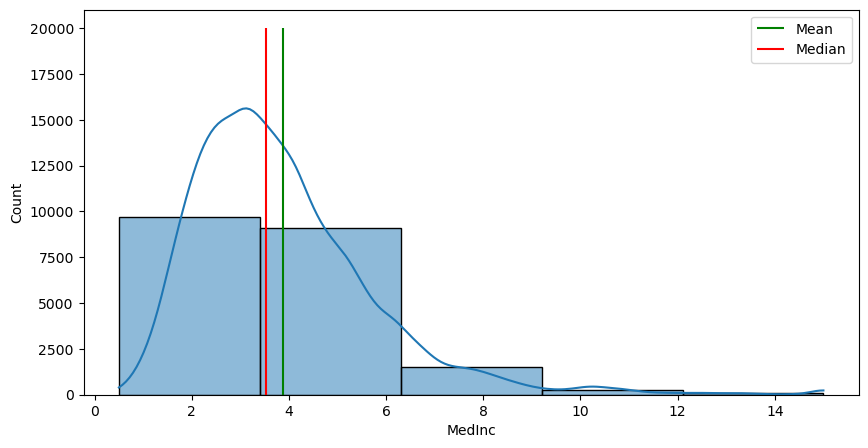

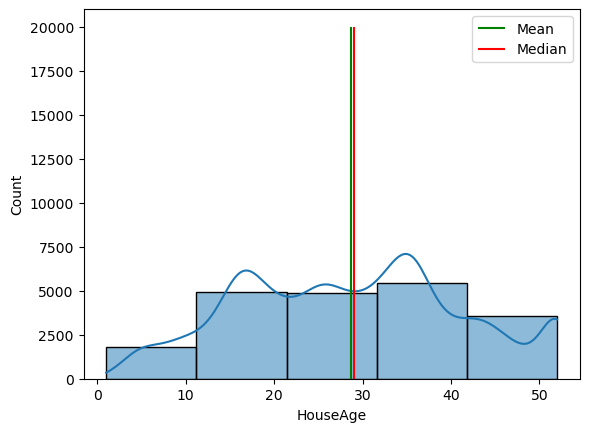

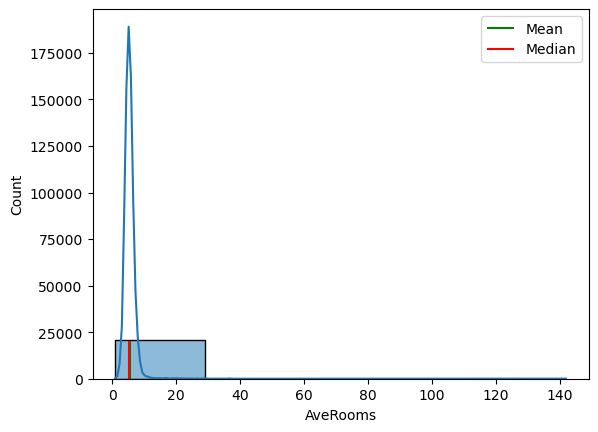

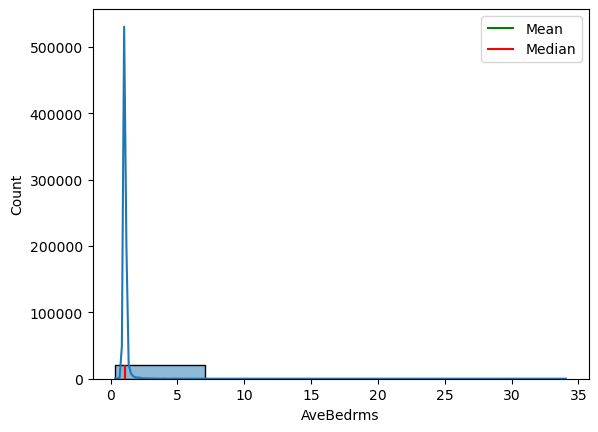

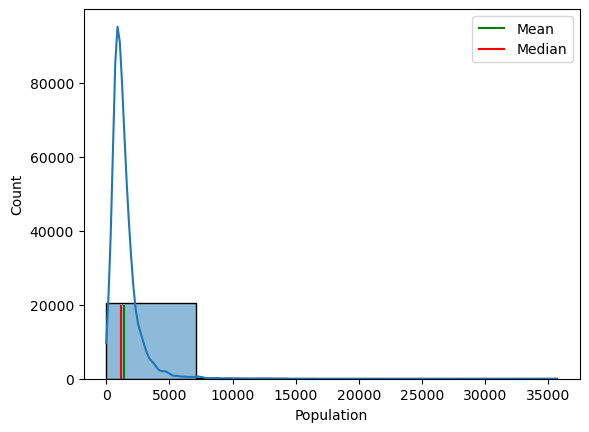

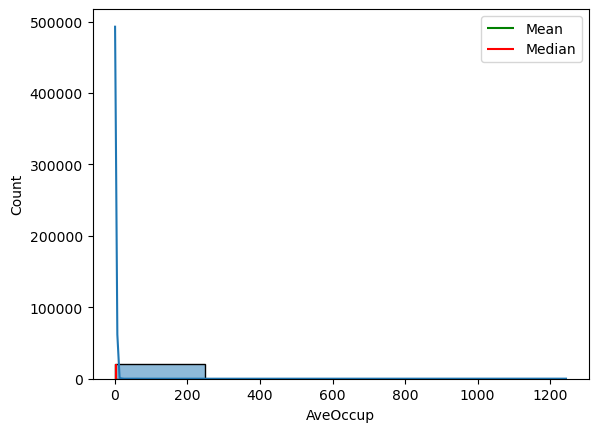

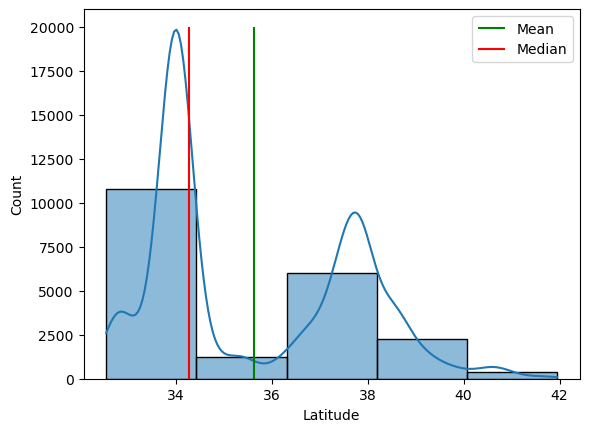

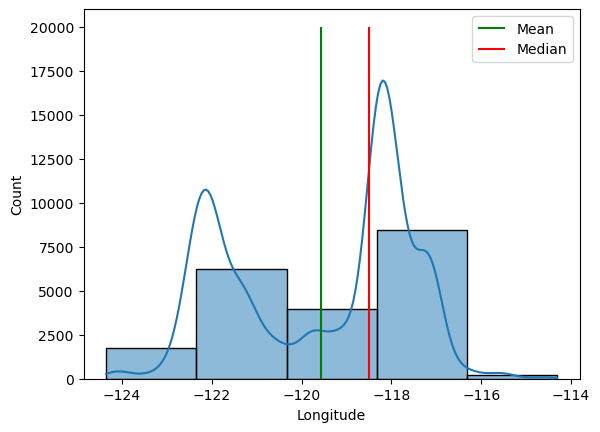

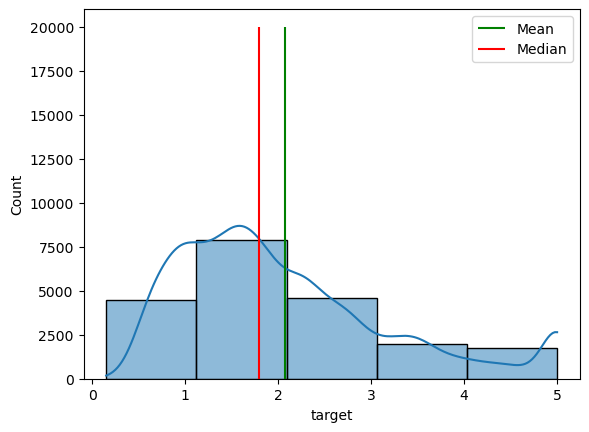

In [87]:
#checking how data is distributed

plt.figure(figsize=(10,5))
for i in num_col.columns:
    sns.histplot(df[i],kde=True,bins=5)
    plt.vlines(df[i].mean(),ymin=0,ymax=20000, color ='g', label='Mean')
    plt.vlines(df[i].median(),ymin=0,ymax=20000, color ='r', label='Median')
    plt.legend()
    plt.show()

In [89]:
#checking null values

df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [91]:
#checking for duplicates

df.duplicated().sum()

0

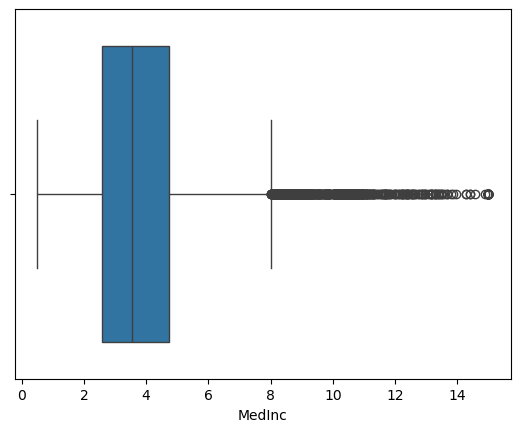

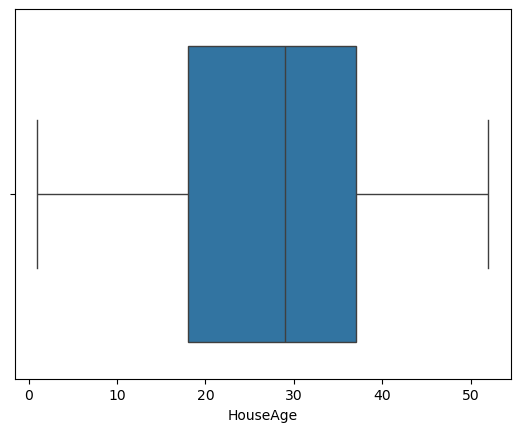

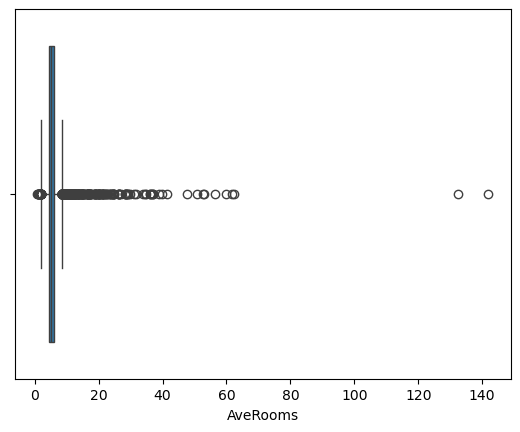

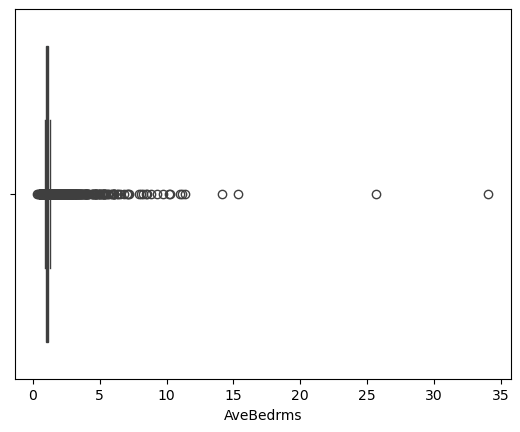

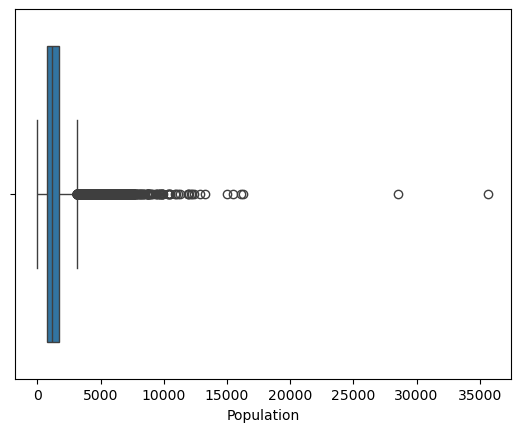

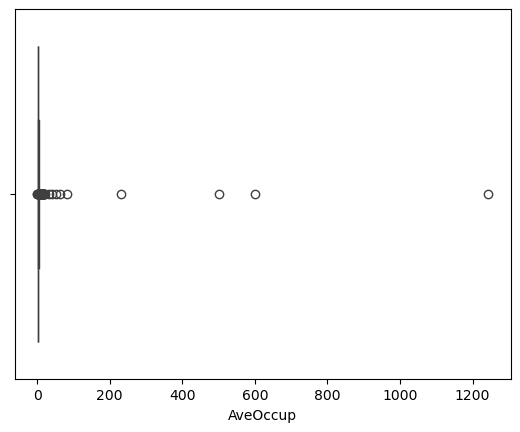

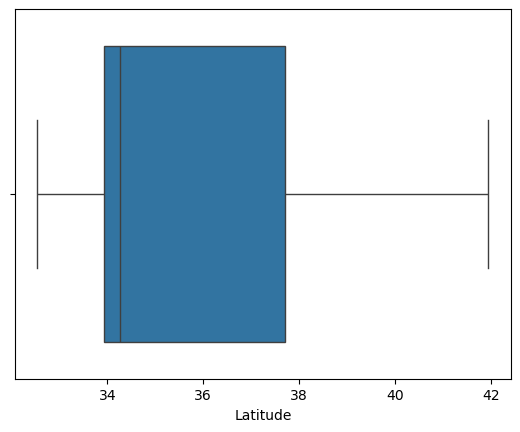

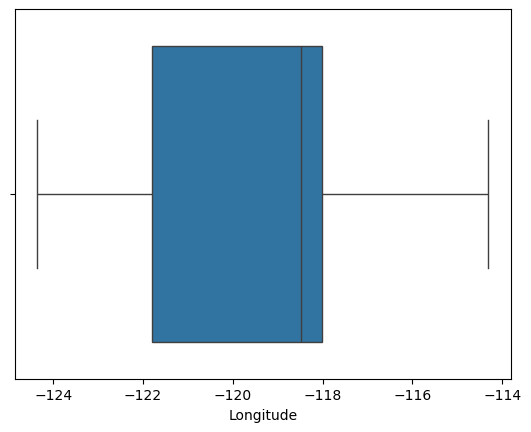

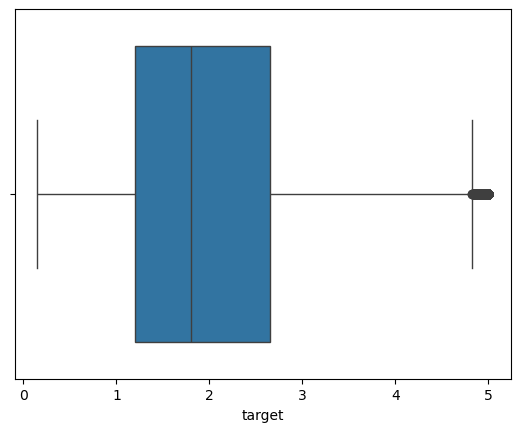

In [93]:
#checking for outliers

for col in num_col:
    sns.boxplot(data=df, x=col)
    plt.show()

In [95]:
#Removing outliers using IQR method

def outliers(df):
    for col in df.select_dtypes(include = 'float64').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 -(1.5* IQR)
        Upper = Q3 + (1.5 * IQR)
        # capping
        df[col] = df[col].apply(lambda x : Lower if x < Lower else Upper if x > Upper else x)
    return df

In [97]:
#assigning df2 as outliers removed data

df2=outliers(df)

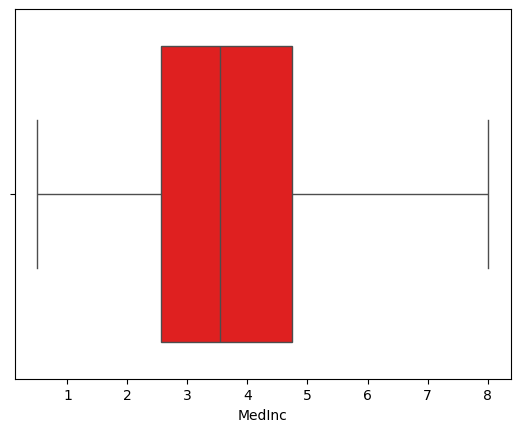

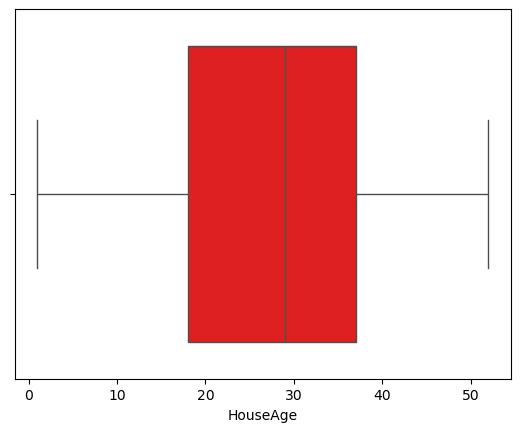

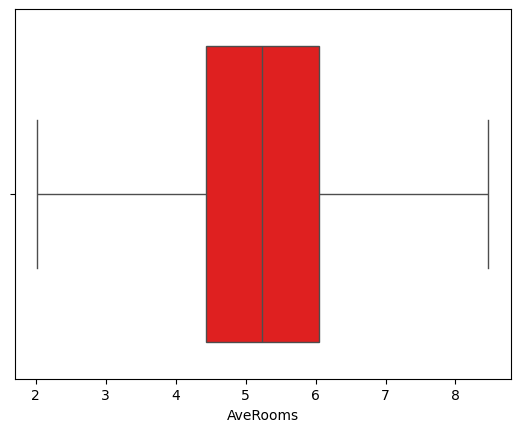

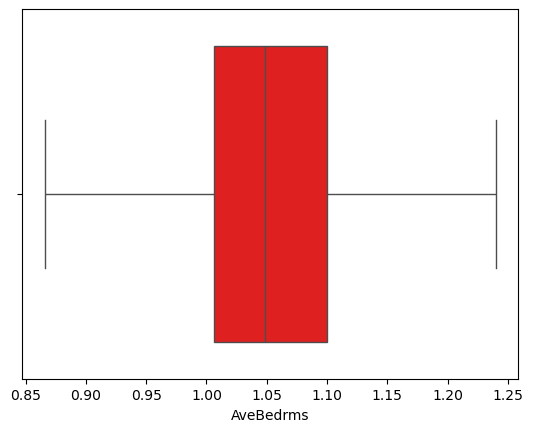

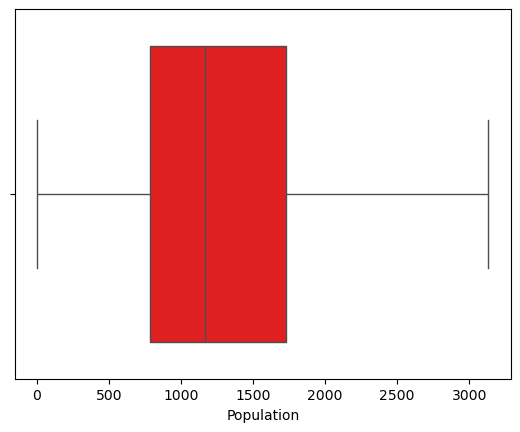

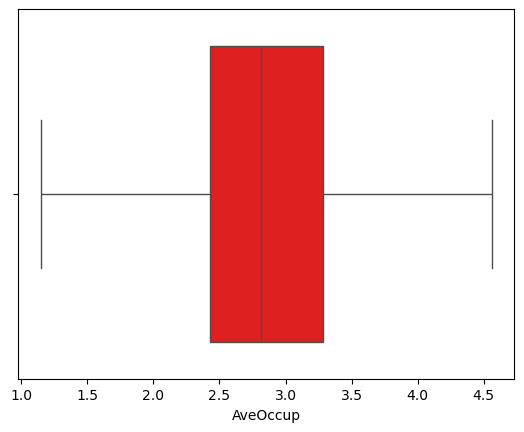

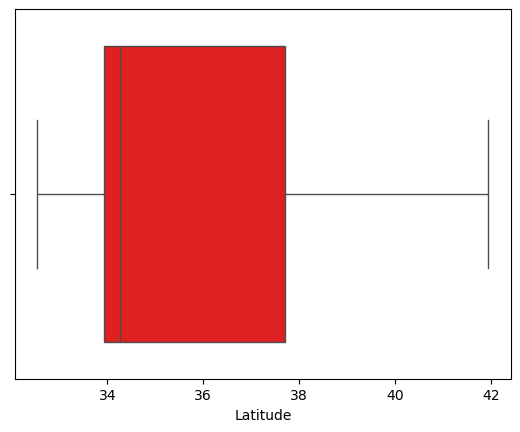

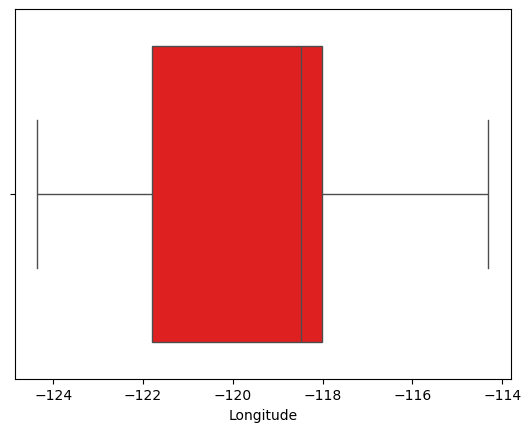

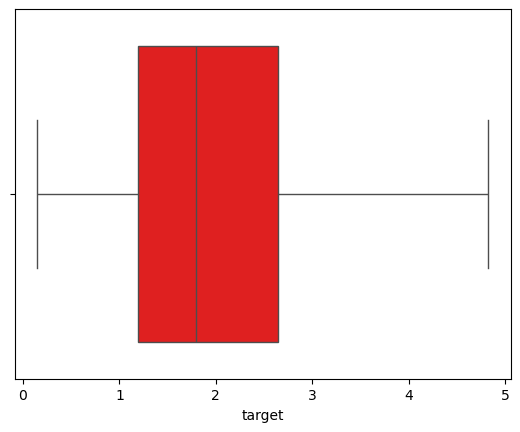

In [99]:
#boxplot after removing outliers

for col in num_col:
    sns.boxplot(data=df2, x=col, color='r')
    plt.show()

In [101]:
#checking skew

df2.skew()

MedInc        0.735618
HouseAge      0.060331
AveRooms      0.348567
AveBedrms     0.462645
Population    0.842247
AveOccup      0.510453
Latitude      0.465953
Longitude    -0.297801
target        0.912330
dtype: float64

### Between -0.5 and 0.5 are considered fairly symmetrical.
### Between -1 and -0.5 or 0.5 and 1 are moderately skewed.
### Less than -1 or greater than 1 indicate high skewness.

In [103]:
#Applying power transformer transformation to remove skewness

pt=PowerTransformer(method='yeo-johnson')

In [105]:
#numerical features(columns)
numerical_features=df2.select_dtypes(include=['int64','float64']).columns

In [107]:
#to save skewness removed features

df2[numerical_features]=pt.fit_transform(df2[numerical_features])
df2[numerical_features].skew()

MedInc       -0.002164
HouseAge     -0.113089
AveRooms      0.002958
AveBedrms    -0.003923
Population    0.008781
AveOccup      0.000402
Latitude      0.153850
Longitude     0.000000
target        0.026767
dtype: float64

In [109]:
df3 = df2[numerical_features]

In [111]:
#Correlation

correlation = df3.corr()

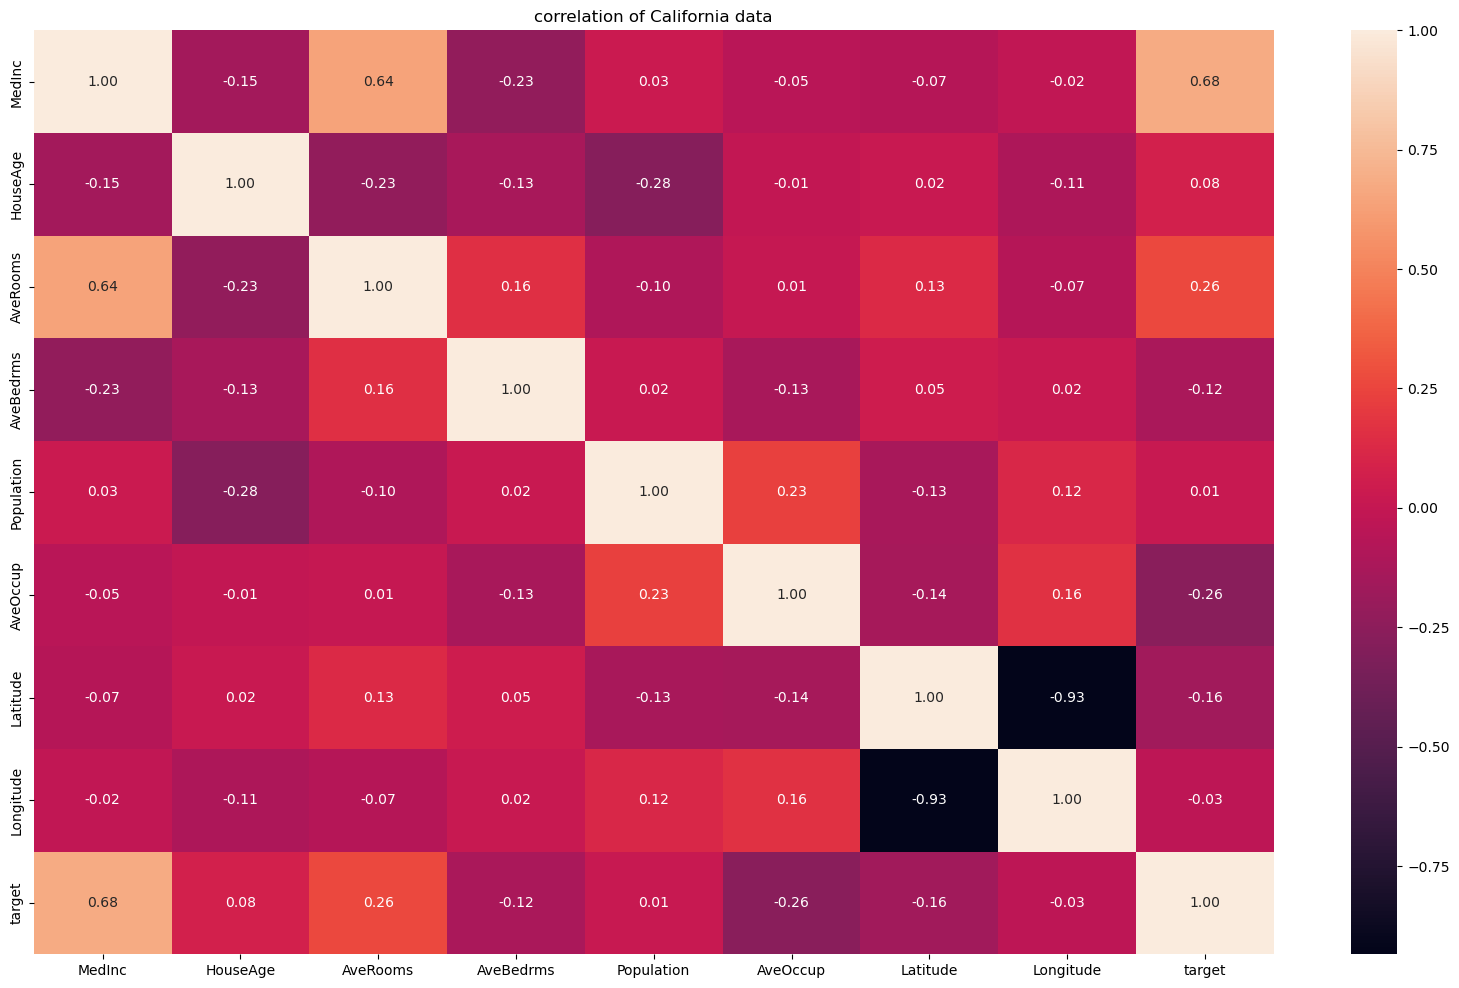

In [113]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation,annot = True, fmt='.2f', cmap = 'rocket')
plt.title('correlation of California data')
plt.show()

In [115]:
#Feature selection

from sklearn.feature_selection import SelectKBest,f_regression

In [117]:
df3.columns  #we have to remove target variable

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [119]:
x=df3.drop('target',axis=1)
y=df3['target']

In [121]:
sk = SelectKBest(score_func=f_regression,k=5)

In [123]:
#fit sk to new variable

x1 = sk.fit_transform(x,y)

In [125]:
x1

array([[ 2.03229611,  1.31235099, -0.36854061, -0.43333073,  1.08903746],
       [ 2.03229611,  0.77529503, -1.10542217, -1.20373199,  1.08240369],
       [ 1.76888042,  2.18616249,  0.26936881, -0.05011249,  1.07907856],
       ...,
       [-1.49827866, -0.02323163,  0.8163172 , -0.81696541,  1.54296057],
       [-1.32710565,  0.07646286,  1.37089124, -1.17895178,  1.54296057],
       [-0.84850039,  0.01644842,  1.27152674, -0.33531784,  1.52740291]])

In [127]:
#Selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude'], dtype='object')

Feature Scores:
      Feature         Score
0      MedInc  17961.958972
2    AveRooms   1544.731853
5    AveOccup   1539.962368
6    Latitude    567.435834
3   AveBedrms    302.686848
1    HouseAge    124.710759
7   Longitude     18.957391
4  Population      2.901431


In [129]:
#scaling

ss = StandardScaler()

In [131]:
x_scld = ss.fit_transform(x)

In [135]:
#split the data

x_train,x_test,y_train,y_test = train_test_split(x_scld,y,test_size=0.2 ,random_state=42)

# Regression Algorithm

### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

In [139]:
model1=LinearRegression()

In [141]:
#fitting to model
model1.fit(x_train,y_train)

LinearRegression()

In [143]:
#predict

y_pred1=model1.predict(x_test)

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [147]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
r2 = r2_score(y_test,y_pred1)

In [149]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.4357641468656279
mse:0.33257276460257784
rmse:0.5766912211943042
r2:0.6666318011973394



### Support Vector Regressor (SVR)

In [151]:
from sklearn.svm import SVR

In [153]:
model2=SVR()

In [155]:
#fitting model
model2.fit(x_train,y_train)

SVR()

In [163]:
y_pred2=model2.predict(x_test)

In [164]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))
r2 = r2_score(y_test,y_pred2)

In [165]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.3327632847043873
mse:0.20902124532957925
rmse:0.457188413380719
r2:0.7904788260389295



### Random Forest Regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [171]:
model3=RandomForestRegressor()

In [173]:
#fitting model
model3.fit(x_train,y_train)

RandomForestRegressor()

In [177]:
#predict
y_pred3=model3.predict(x_test)

In [179]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred3))
r2 = r2_score(y_test,y_pred3)

In [181]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.28801058530914764
mse:0.17165002816235234
rmse:0.41430668370465895
r2:0.8279394261845523



### Gradient Boosting Regressor

In [183]:
model4=GradientBoostingRegressor()

In [185]:
#fitting model
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [187]:
#predict
y_pred4=model4.predict(x_test)

In [189]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred4)
mse = mean_squared_error(y_test,y_pred4)
rmse = np.sqrt(mean_squared_error(y_test,y_pred4))
r2 = r2_score(y_test,y_pred4)

In [191]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.33007700257099015
mse:0.20308260985522997
rmse:0.45064687933594966
r2:0.7964316653034291



### Decision Tree Regressor

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [227]:
model5=DecisionTreeRegressor()

In [229]:
#fitting model
model5.fit(x_train,y_train)

DecisionTreeRegressor()

In [233]:
#predict
y_pred5=model5.predict(x_test)

In [235]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred5)
mse = mean_squared_error(y_test,y_pred5)
rmse = np.sqrt(mean_squared_error(y_test,y_pred5))
r2 = r2_score(y_test,y_pred5)

In [237]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.4031254808861291
mse:0.34791786067090463
rmse:0.5898456244399077
r2:0.6512500033436729



### AdaBoostRegressor

In [194]:
from sklearn.ensemble import AdaBoostRegressor

In [211]:
model6=AdaBoostRegressor()

In [213]:
#fitting model
model6.fit(x_train,y_train)

AdaBoostRegressor()

In [215]:
#predict
y_pred6=model6.predict(x_test)

In [223]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred6)
mse = mean_squared_error(y_test,y_pred6)
rmse = np.sqrt(mean_squared_error(y_test,y_pred6))
r2 = r2_score(y_test,y_pred6)

In [225]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.5231416039079577
mse:0.4225305686136649
rmse:0.6500235138928936
r2:0.5764588397185016



### MLP Regressor

In [241]:
from sklearn.neural_network import MLPRegressor

In [247]:
model7=MLPRegressor()

In [249]:
#fitting model
model7.fit(x_train,y_train)

MLPRegressor()

In [253]:
#predict
y_pred7=model7.predict(x_test)

In [255]:
#Evaluation

mae = mean_absolute_error(y_test,y_pred7)
mse = mean_squared_error(y_test,y_pred7)
rmse = np.sqrt(mean_squared_error(y_test,y_pred7))
r2 = r2_score(y_test,y_pred7)

In [257]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")

mae:0.3224076183988288
mse:0.19658697127867494
rmse:0.4433812933341628
r2:0.8029428398878149



# Best Model

### Random Forest Regressor is the best model among all 
with R2 Score : 0.8279394261845523 

Random Forest outperforms simpler models because it combines the strengths of decision trees (flexibility, interpretability) while mitigating their weaknesses (overfitting, sensitivity to noise). Its ability to handle non-linear relationships, high-dimensional data, and noise makes it a go-to model for many regression tasks.

# Worst Performing Model

### AdaBoost Regressor is the Worst-performing algorithm
with R2 Score =0.5764588397185016

The AdaBoost Regressor may not perform well in certain situations due to various factors related to data characteristics, model configuration, and the nature of boosting itself. AdaBoost is an ensemble method that combines the predictions of weak learners (usually decision trees) to improve performance. 

In [264]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. MLPRegressor':MLPRegressor(),
    '7. AdaBoostRegressor':AdaBoostRegressor()
}

In [276]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(x_train,y_train)  
    # make the prediction
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R2": r2,}

In [277]:
results_df = pd.DataFrame(results).T

In [278]:
results_df

,MSE,MAE,RMSE,R2
1. Linear Regression,0.332573,0.435764,0.576691,0.666632
2. Decision Tree Regressor,0.346364,0.404022,0.588527,0.652807
3. Random Forest Regressor,0.171996,0.288431,0.414724,0.827593
4. Gradiant Boosting Regressor,0.203041,0.330027,0.450601,0.796473
5. Support Vector Regressor,0.209021,0.332763,0.457188,0.790479
6. MLPRegressor,0.194663,0.322308,0.441207,0.804871
7. AdaBoostRegressor,0.424999,0.524274,0.651920,0.573984


## Finding Best Model

In [282]:
best_model=results_df.loc[results_df['R2'].idxmax()]
best_model

MSE     0.171996
MAE     0.288431
RMSE    0.414724
R2      0.827593
Name: 3. Random Forest Regressor, dtype: float64

### Saving model

In [285]:
import joblib

In [287]:
joblib.dump(best_model,'sv.joblib')

['sv.joblib']

In [289]:
loaded_svmdl = joblib.load('sv.joblib')